### Классная работа

In [2]:
# Пример реализации наивного гауссовского байесовского классификатора
import numpy as np


x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

# считаем математическое ожидание
mw1, ml1 = np.mean(x_train[y_train == 1], axis=0)  # класс 1
mw_1, ml_1 = np.mean(x_train[y_train == -1], axis=0)  # класс -1

# формула для вычисления дисперсии здесь немного другая 1/N*sum(...)
sw1, sl1 = np.var(x_train[y_train == 1], axis=0, ddof=1)
sw_1, sl_1 = np.var(x_train[y_train == -1], axis=0, ddof=1)

print('МО: ', mw1, ml1, mw_1, ml_1)
print('Дисперсии:', sw1, sl1, sw_1, sl_1)

x = [10, 40]  # ширина, длина жука (для тестов результата)

a_1 = lambda x: -np.log(sw_1 * sl_1) - (x[0] - mw_1) ** 2 / (2 * sw_1) - (x[1] - ml_1) ** 2 / (2 * sl_1)  # вероятность класса -1
a1 = lambda x: -np.log(sw1 * sl1) - (x[0] - mw1) ** 2 / (2 * sw1) - (x[1] - ml1) ** 2 / (2 * sl1)  # вероятность класса 1
y = np.argmax([a_1(x), a1(x)]) * 2 - 1  # *2 - 1 для того, чтобы метки классов были -1 и 1 (тк argmax вернет индекс, те 0 или 1)

print('Номер класса (-1 - гусеница, 1 - божья коровка): ', y)

# тестирование по обучающей выборки
pr = []
for x in x_train:
    pr.append(np.argmax([a_1(x), a1(x)]) * 2 - 1)

pr = np.array(pr)
Q = np.mean(pr != y_train) # доля ошибок
print(Q)

МО:  31.0 35.0 14.4 52.0
Дисперсии: 80.0 50.0 34.3 182.5
Номер класса (-1 - гусеница, 1 - божья коровка):  -1
0.0


### Домашняя работа

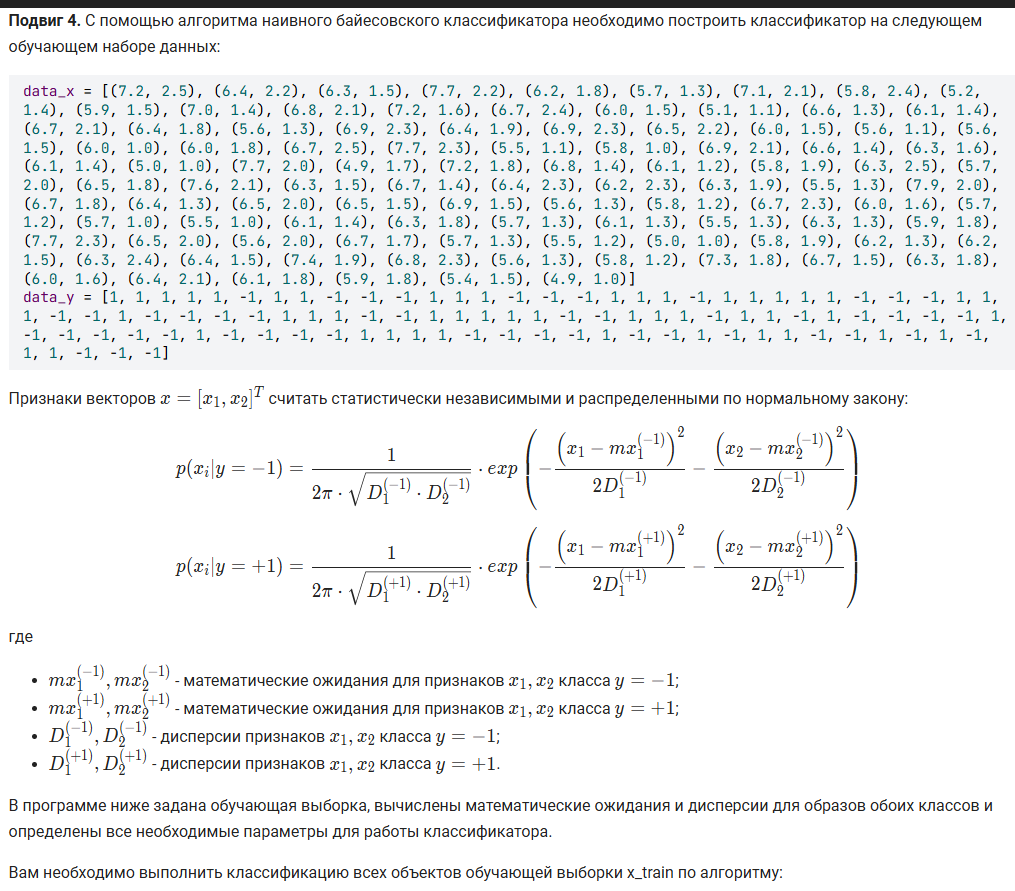
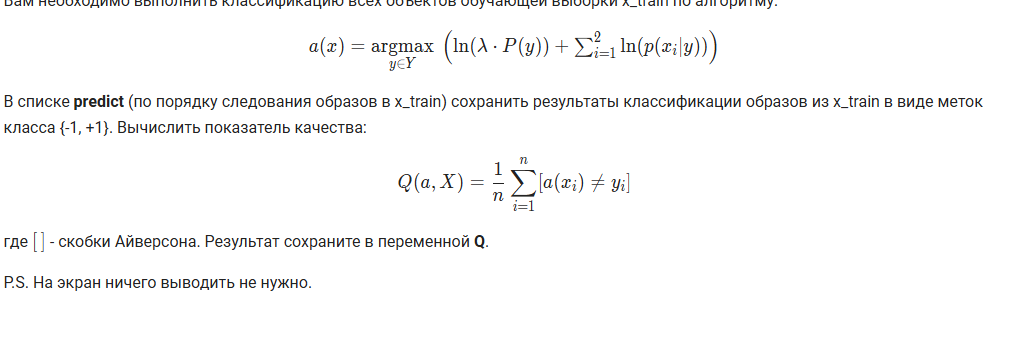

In [6]:
import numpy as np

data_x = [(7.2, 2.5), (6.4, 2.2), (6.3, 1.5), (7.7, 2.2), (6.2, 1.8), (5.7, 1.3), (7.1, 2.1), (5.8, 2.4), (5.2, 1.4), (5.9, 1.5), (7.0, 1.4), (6.8, 2.1), (7.2, 1.6), (6.7, 2.4), (6.0, 1.5), (5.1, 1.1), (6.6, 1.3), (6.1, 1.4), (6.7, 2.1), (6.4, 1.8), (5.6, 1.3), (6.9, 2.3), (6.4, 1.9), (6.9, 2.3), (6.5, 2.2), (6.0, 1.5), (5.6, 1.1), (5.6, 1.5), (6.0, 1.0), (6.0, 1.8), (6.7, 2.5), (7.7, 2.3), (5.5, 1.1), (5.8, 1.0), (6.9, 2.1), (6.6, 1.4), (6.3, 1.6), (6.1, 1.4), (5.0, 1.0), (7.7, 2.0), (4.9, 1.7), (7.2, 1.8), (6.8, 1.4), (6.1, 1.2), (5.8, 1.9), (6.3, 2.5), (5.7, 2.0), (6.5, 1.8), (7.6, 2.1), (6.3, 1.5), (6.7, 1.4), (6.4, 2.3), (6.2, 2.3), (6.3, 1.9), (5.5, 1.3), (7.9, 2.0), (6.7, 1.8), (6.4, 1.3), (6.5, 2.0), (6.5, 1.5), (6.9, 1.5), (5.6, 1.3), (5.8, 1.2), (6.7, 2.3), (6.0, 1.6), (5.7, 1.2), (5.7, 1.0), (5.5, 1.0), (6.1, 1.4), (6.3, 1.8), (5.7, 1.3), (6.1, 1.3), (5.5, 1.3), (6.3, 1.3), (5.9, 1.8), (7.7, 2.3), (6.5, 2.0), (5.6, 2.0), (6.7, 1.7), (5.7, 1.3), (5.5, 1.2), (5.0, 1.0), (5.8, 1.9), (6.2, 1.3), (6.2, 1.5), (6.3, 2.4), (6.4, 1.5), (7.4, 1.9), (6.8, 2.3), (5.6, 1.3), (5.8, 1.2), (7.3, 1.8), (6.7, 1.5), (6.3, 1.8), (6.0, 1.6), (6.4, 2.1), (6.1, 1.8), (5.9, 1.8), (5.4, 1.5), (4.9, 1.0)]
data_y = [1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1]

x_train = np.array(data_x)
y_train = np.array(data_y)

# математические ожидания
mx11, mx12 = np.mean(x_train[y_train == -1], axis=0)
mx21, mx22 = np.mean(x_train[y_train == 1], axis=0)

# дисперсии
Dx11, Dx12 = np.var(x_train[y_train == -1], axis=0)
Dx21, Dx22 = np.var(x_train[y_train == 1], axis=0)

lm1 = 1     # штраф неверной классификации 1-го класса (-1)
lm2 = 1     # штраф неверной классификации 2-го класса (+1)
P1 = 0.5    # априорная вероятность появления образов 1-го класса
P2 = 1 - P1 # априорная вероятность появления образов 2-го класса

a1 = lambda x: np.log(lm1 * 1/2) + np.log(1/(2*np.pi * (Dx11 * Dx12)**1/2) * np.exp(-((x[0] - mx11)**2 / (2*Dx11)) - ((x[1] - mx12)**2 / (2*Dx12))))
a2 = lambda x: np.log(lm2 * 1/2) + np.log(1/(2*np.pi * (Dx21 * Dx22)**1/2) * np.exp(-((x[0] - mx21)**2 / (2*Dx21)) - ((x[1] - mx22)**2 / (2*Dx22))))

predict = []
for x in x_train:
    pred = np.argmax([a1(x), a2(x)]) * 2 - 1
    predict.append(pred)
predict = np.array(predict)
Q = np.mean(predict != y_train)
predict, Q

(array([ 1,  1, -1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,
        -1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1, -1,
         1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1, -1,
         1,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
        -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1,
         1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1, -1],
       dtype=int64),
 0.06)

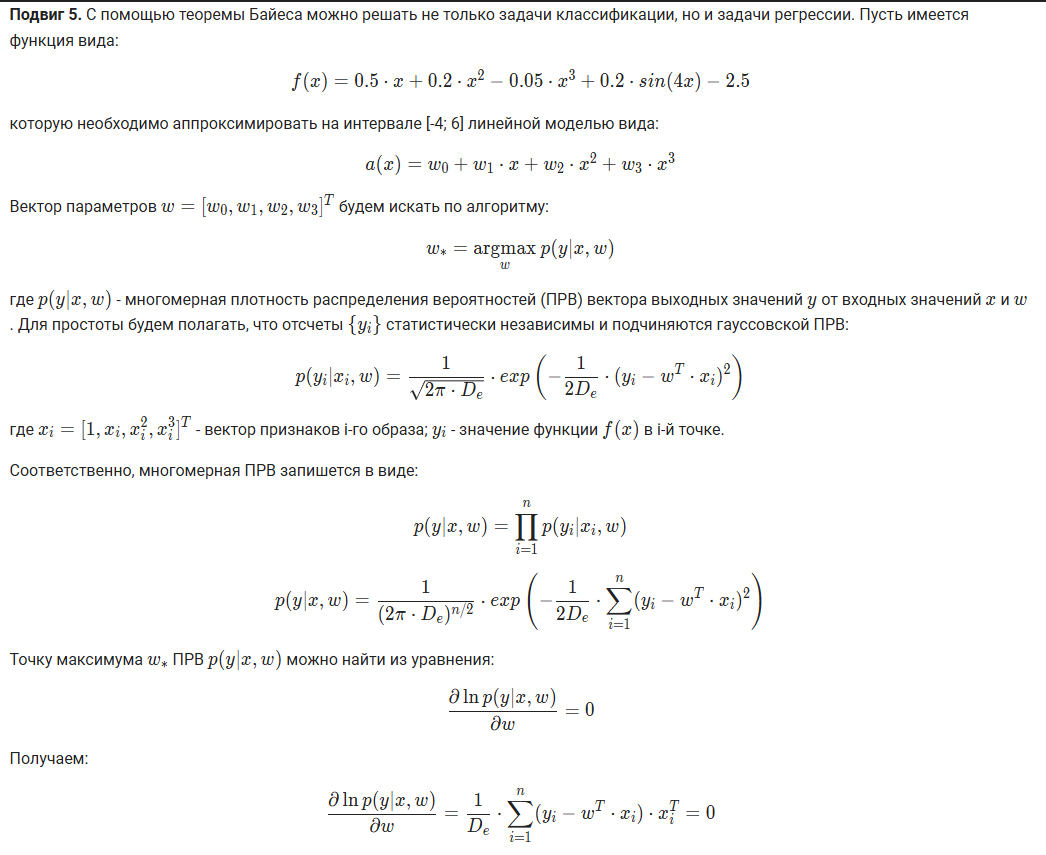
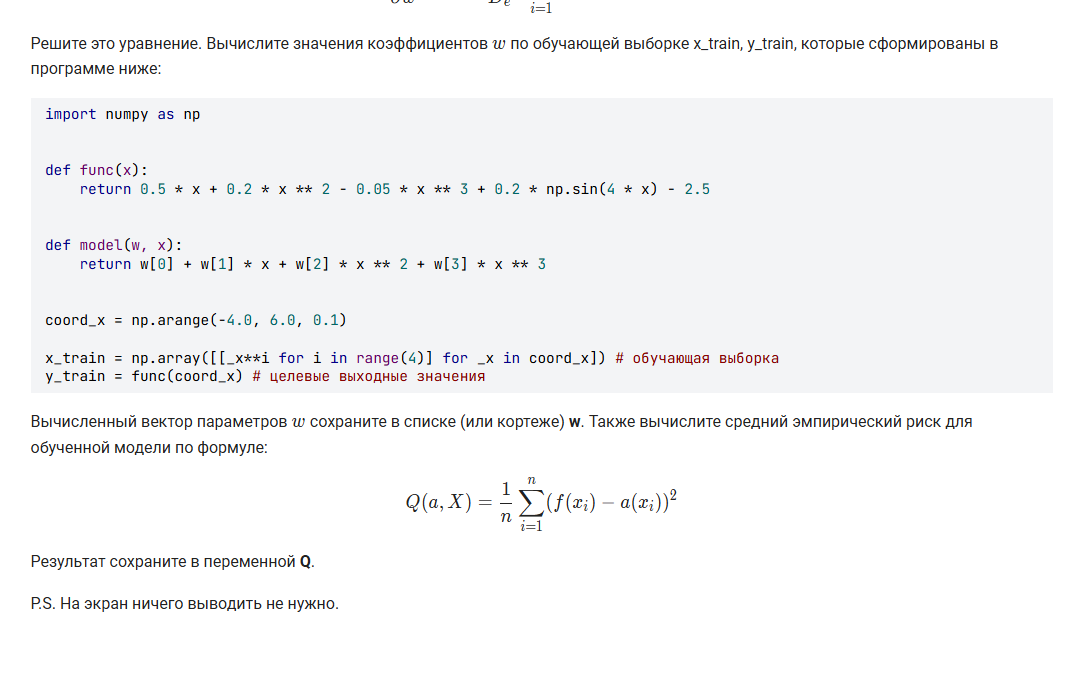

In [14]:
import numpy as np


def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 2.5


def model(w, x):
    return w[0] + w[1] * x + w[2] * x ** 2 + w[3] * x ** 3


coord_x = np.arange(-4.0, 6.0, 0.1)

x_train = np.array([[_x**i for i in range(4)] for _x in coord_x]) # обучающая выборка
y_train = func(coord_x) # целевые выходные значения

w = np.linalg.inv(x_train.T @ x_train) @ x_train.T @y_train
Q = np.mean((y_train - model(w, x_train[:, 1])) ** 2)
w, Q

(array([-2.49213311,  0.50342222,  0.19781693, -0.04986103]),
 0.0196629429495297)